In [1]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


# **Convolutional Neural Network (CNN)**

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, RandomRotation, Rescaling, RandomZoom, RandomBrightness
#from tensorflow.keras import layers

The dataset has been split with proportion of 70% train, 15% validation, and 15% test. In the following section, I loaded the data from the split using tensorflow library.

In [3]:
train = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/train',image_size=(400,600))
test = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/test',image_size=(400,600))
validation = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_200x/eval',image_size=(400,600))

Found 1408 files belonging to 2 classes.
Found 304 files belonging to 2 classes.
Found 301 files belonging to 2 classes.


In [4]:
train_40 = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/train',image_size=(400,600))
test_40 = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/test',image_size=(400,600))
validation_40 = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/colab_notebooks/ws23_profile_areas/project02/images_40x/eval',image_size=(400,600))

Found 1395 files belonging to 2 classes.
Found 302 files belonging to 2 classes.
Found 298 files belonging to 2 classes.


In [5]:
train_iterator = train.as_numpy_iterator()
batch = train_iterator.next()

In [6]:
len(train)

44

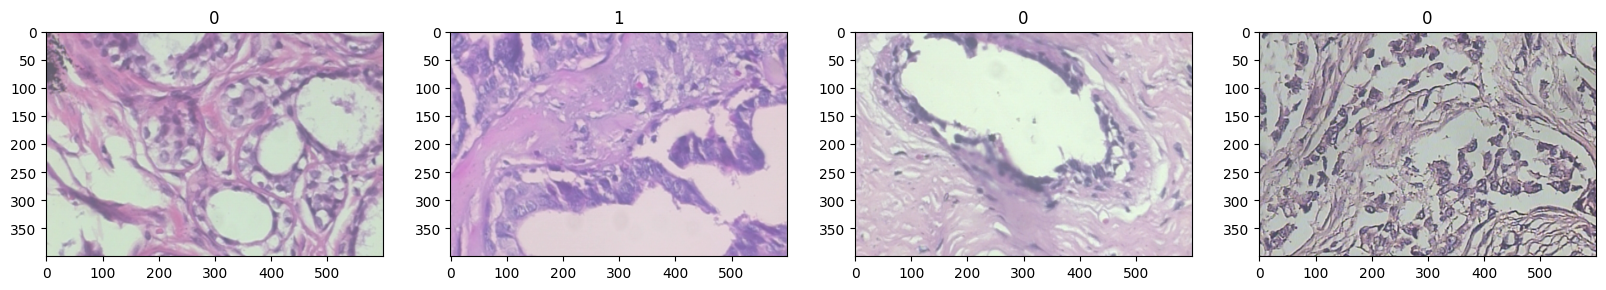

In [7]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Normalization Applied without Augmentation Layer**

In [8]:
modelCNN = Sequential()

#Rescaling - Normalization
modelCNN.add(Rescaling(1/127.0, offset=-1))

modelCNN.add(Conv2D(8,(3,3), 1, activation='relu', input_shape=(400,600,3)))
modelCNN.add(MaxPooling2D())

modelCNN.add(Conv2D(16,(3,3), 1, activation='relu'))
modelCNN.add(MaxPooling2D())

modelCNN.add(Conv2D(32,(3,3), 1, activation='relu'))
modelCNN.add(MaxPooling2D())

modelCNN.add(Conv2D(64,(3,3), 1, activation='relu'))
modelCNN.add(MaxPooling2D())

#modelCNN.add(Conv2D(32,(3,3), 1, activation='relu'))
#modelCNN.add(MaxPooling2D())

modelCNN.add(Conv2D(16,(3,3), 1, activation='relu'))
modelCNN.add(MaxPooling2D())

modelCNN.add(Conv2D(8,(3,3), 1, activation='relu'))
modelCNN.add(MaxPooling2D())

modelCNN.add(Flatten())

modelCNN.add(Dense(400, activation='relu'))
modelCNN.add(Dense(1, activation='sigmoid'))

**Normalization Applied with Random Zoom Augmentation Layer**



In [9]:
modelCNN_zoom = Sequential()

#Rescaling - Normalization
modelCNN_zoom.add(Rescaling(1/127.0, offset=-1))

#Layers for Data Augmentation
modelCNN_zoom.add(RandomZoom(-0.3,-0.3))

modelCNN_zoom.add(Conv2D(8,(3,3), 1, activation='relu', input_shape=(400,600,3)))
modelCNN_zoom.add(MaxPooling2D())

modelCNN_zoom.add(Conv2D(16,(3,3), 1, activation='relu'))
modelCNN_zoom.add(MaxPooling2D())

modelCNN_zoom.add(Conv2D(32,(3,3), 1, activation='relu'))
modelCNN_zoom.add(MaxPooling2D())

modelCNN_zoom.add(Conv2D(64,(3,3), 1, activation='relu'))
modelCNN_zoom.add(MaxPooling2D())

#modelCNN_zoom.add(Conv2D(32,(3,3), 1, activation='relu'))
#modelCNN_zoom.add(MaxPooling2D())

modelCNN_zoom.add(Conv2D(16,(3,3), 1, activation='relu'))
modelCNN_zoom.add(MaxPooling2D())

modelCNN_zoom.add(Conv2D(8,(3,3), 1, activation='relu'))
modelCNN_zoom.add(MaxPooling2D())

modelCNN_zoom.add(Flatten())

modelCNN_zoom.add(Dense(400, activation='relu'))
modelCNN_zoom.add(Dense(1, activation='sigmoid'))

**Normalization Applied with Brightness Augmentation Layer**



In [10]:
modelCNN_bright = Sequential()

#Rescaling - Normalization
modelCNN_bright.add(Rescaling(1/127.0, offset=-1))

#Layers for Data Augmentation
modelCNN_bright.add(RandomBrightness(factor=0.1))

modelCNN_bright.add(Conv2D(8,(3,3), 1, activation='relu', input_shape=(400,600,3)))
modelCNN_bright.add(MaxPooling2D())

modelCNN_bright.add(Conv2D(16,(3,3), 1, activation='relu'))
modelCNN_bright.add(MaxPooling2D())

modelCNN_bright.add(Conv2D(32,(3,3), 1, activation='relu'))
modelCNN_bright.add(MaxPooling2D())

modelCNN_bright.add(Conv2D(64,(3,3), 1, activation='relu'))
modelCNN_bright.add(MaxPooling2D())

#modelCNN_bright.add(Conv2D(32,(3,3), 1, activation='relu'))
#modelCNN_bright.add(MaxPooling2D())

modelCNN_bright.add(Conv2D(16,(3,3), 1, activation='relu'))
modelCNN_bright.add(MaxPooling2D())

modelCNN_bright.add(Conv2D(8,(3,3), 1, activation='relu'))
modelCNN_bright.add(MaxPooling2D())

modelCNN_bright.add(Flatten())

modelCNN_bright.add(Dense(400, activation='relu'))
modelCNN_bright.add(Dense(1, activation='sigmoid'))

**Normalization Applied with Random Rotation Augmentation Layer**

In [11]:
modelCNN_rotate = Sequential()

#Rescaling - Normalization
modelCNN_rotate.add(Rescaling(1/127.0, offset=-1))

#Layers for Data Augmentation
modelCNN_rotate.add(RandomRotation(0.2))

modelCNN_rotate.add(Conv2D(8,(3,3), 1, activation='relu', input_shape=(400,600,3)))
modelCNN_rotate.add(MaxPooling2D())

modelCNN_rotate.add(Conv2D(16,(3,3), 1, activation='relu'))
modelCNN_rotate.add(MaxPooling2D())

modelCNN_rotate.add(Conv2D(32,(3,3), 1, activation='relu'))
modelCNN_rotate.add(MaxPooling2D())

modelCNN_rotate.add(Conv2D(64,(3,3), 1, activation='relu'))
modelCNN_rotate.add(MaxPooling2D())

#modelCNN_rotate.add(Conv2D(32,(3,3), 1, activation='relu'))
#modelCNN_rotate.add(MaxPooling2D())

modelCNN_rotate.add(Conv2D(16,(3,3), 1, activation='relu'))
modelCNN_rotate.add(MaxPooling2D())

modelCNN_rotate.add(Conv2D(8,(3,3), 1, activation='relu'))
modelCNN_rotate.add(MaxPooling2D())

modelCNN_rotate.add(Flatten())

modelCNN_rotate.add(Dense(400, activation='relu'))
modelCNN_rotate.add(Dense(1, activation='sigmoid'))

Optimizer is set to adam and loss is set to binary crossentropy

In [12]:
modelCNN.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
modelCNN_zoom.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
modelCNN_bright.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
modelCNN_rotate.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [13]:
modelCNN.build(input_shape=(3,400,600,3))
modelCNN_zoom.build(input_shape=(3,400,600,3))
modelCNN_bright.build(input_shape=(3,400,600,3))
modelCNN_rotate.build(input_shape=(3,400,600,3))

In [14]:
modelCNN.summary()
modelCNN_zoom.summary()
modelCNN_bright.summary()
modelCNN_rotate.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (3, 400, 600, 3)          0         
                                                                 
 conv2d (Conv2D)             (3, 398, 598, 8)          224       
                                                                 
 max_pooling2d (MaxPooling2  (3, 199, 299, 8)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (3, 197, 297, 16)         1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (3, 98, 148, 16)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (3, 96, 146, 32)          4

#### **Magnification 200x**

Train the model

In [15]:
hist = modelCNN.fit(train, epochs=10, validation_data=validation)

Epoch 1/10
44/44 [==============================] - 499s 11s/step - loss: 0.4982 - accuracy: 0.7770 - val_loss: 0.3549 - val_accuracy: 0.8771
Epoch 2/10
44/44 [==============================] - 24s 494ms/step - loss: 0.4085 - accuracy: 0.8523 - val_loss: 0.3277 - val_accuracy: 0.8937
Epoch 3/10
44/44 [==============================] - 26s 543ms/step - loss: 0.3859 - accuracy: 0.8665 - val_loss: 0.3249 - val_accuracy: 0.8804
Epoch 4/10
44/44 [==============================] - 25s 506ms/step - loss: 0.3687 - accuracy: 0.8622 - val_loss: 0.4747 - val_accuracy: 0.7276
Epoch 5/10
44/44 [==============================] - 23s 456ms/step - loss: 0.3963 - accuracy: 0.8416 - val_loss: 0.2860 - val_accuracy: 0.8970
Epoch 6/10
44/44 [==============================] - 30s 613ms/step - loss: 0.3430 - accuracy: 0.8778 - val_loss: 0.2933 - val_accuracy: 0.8937
Epoch 7/10
44/44 [==============================] - 23s 469ms/step - loss: 0.3226 - accuracy: 0.8942 - val_loss: 0.2969 - val_accuracy: 0.8804


In [16]:
hist_zoom = modelCNN_zoom.fit(train, epochs=10, validation_data=validation)

Epoch 1/10
44/44 [==============================] - 28s 457ms/step - loss: 0.5389 - accuracy: 0.7124 - val_loss: 0.4206 - val_accuracy: 0.8605
Epoch 2/10
44/44 [==============================] - 23s 460ms/step - loss: 0.4454 - accuracy: 0.8082 - val_loss: 0.4214 - val_accuracy: 0.8140
Epoch 3/10
44/44 [==============================] - 25s 484ms/step - loss: 0.4036 - accuracy: 0.8452 - val_loss: 0.3377 - val_accuracy: 0.8804
Epoch 4/10
44/44 [==============================] - 23s 459ms/step - loss: 0.3517 - accuracy: 0.8608 - val_loss: 0.2936 - val_accuracy: 0.8970
Epoch 5/10
44/44 [==============================] - 30s 628ms/step - loss: 0.3221 - accuracy: 0.8722 - val_loss: 0.2657 - val_accuracy: 0.9037
Epoch 6/10
44/44 [==============================] - 23s 475ms/step - loss: 0.3004 - accuracy: 0.8835 - val_loss: 0.2729 - val_accuracy: 0.9037
Epoch 7/10
44/44 [==============================] - 25s 508ms/step - loss: 0.2927 - accuracy: 0.8913 - val_loss: 0.2835 - val_accuracy: 0.8870

In [17]:
hist_bright = modelCNN_bright.fit(train, epochs=10, validation_data=validation)

Epoch 1/10
44/44 [==============================] - 27s 464ms/step - loss: 0.6628 - accuracy: 0.6776 - val_loss: 0.6486 - val_accuracy: 0.6910
Epoch 2/10
44/44 [==============================] - 29s 616ms/step - loss: 0.6311 - accuracy: 0.6903 - val_loss: 0.6315 - val_accuracy: 0.6910
Epoch 3/10
44/44 [==============================] - 22s 457ms/step - loss: 0.6225 - accuracy: 0.6903 - val_loss: 0.6213 - val_accuracy: 0.6910
Epoch 4/10
44/44 [==============================] - 25s 475ms/step - loss: 0.6222 - accuracy: 0.6903 - val_loss: 0.6190 - val_accuracy: 0.6910
Epoch 5/10
44/44 [==============================] - 23s 460ms/step - loss: 0.6196 - accuracy: 0.6903 - val_loss: 0.6183 - val_accuracy: 0.6910
Epoch 6/10
44/44 [==============================] - 23s 453ms/step - loss: 0.6194 - accuracy: 0.6903 - val_loss: 0.6183 - val_accuracy: 0.6910
Epoch 7/10
44/44 [==============================] - 23s 460ms/step - loss: 0.6198 - accuracy: 0.6903 - val_loss: 0.6195 - val_accuracy: 0.6910

In [18]:
hist_rotate = modelCNN_rotate.fit(train, epochs=10, validation_data=validation)

Epoch 1/10
44/44 [==============================] - 25s 454ms/step - loss: 0.5472 - accuracy: 0.6939 - val_loss: 0.4321 - val_accuracy: 0.8106
Epoch 2/10
44/44 [==============================] - 29s 619ms/step - loss: 0.4496 - accuracy: 0.8295 - val_loss: 0.3978 - val_accuracy: 0.8771
Epoch 3/10
44/44 [==============================] - 23s 461ms/step - loss: 0.4039 - accuracy: 0.8530 - val_loss: 0.3160 - val_accuracy: 0.8771
Epoch 4/10
44/44 [==============================] - 25s 468ms/step - loss: 0.4020 - accuracy: 0.8416 - val_loss: 0.3082 - val_accuracy: 0.8738
Epoch 5/10
44/44 [==============================] - 23s 466ms/step - loss: 0.3638 - accuracy: 0.8551 - val_loss: 0.2979 - val_accuracy: 0.8804
Epoch 6/10
44/44 [==============================] - 25s 510ms/step - loss: 0.3660 - accuracy: 0.8551 - val_loss: 0.2952 - val_accuracy: 0.8804
Epoch 7/10
44/44 [==============================] - 23s 459ms/step - loss: 0.3486 - accuracy: 0.8672 - val_loss: 0.3346 - val_accuracy: 0.8571

Below is the graph for loss and accuracy between train dataset and validation dataset

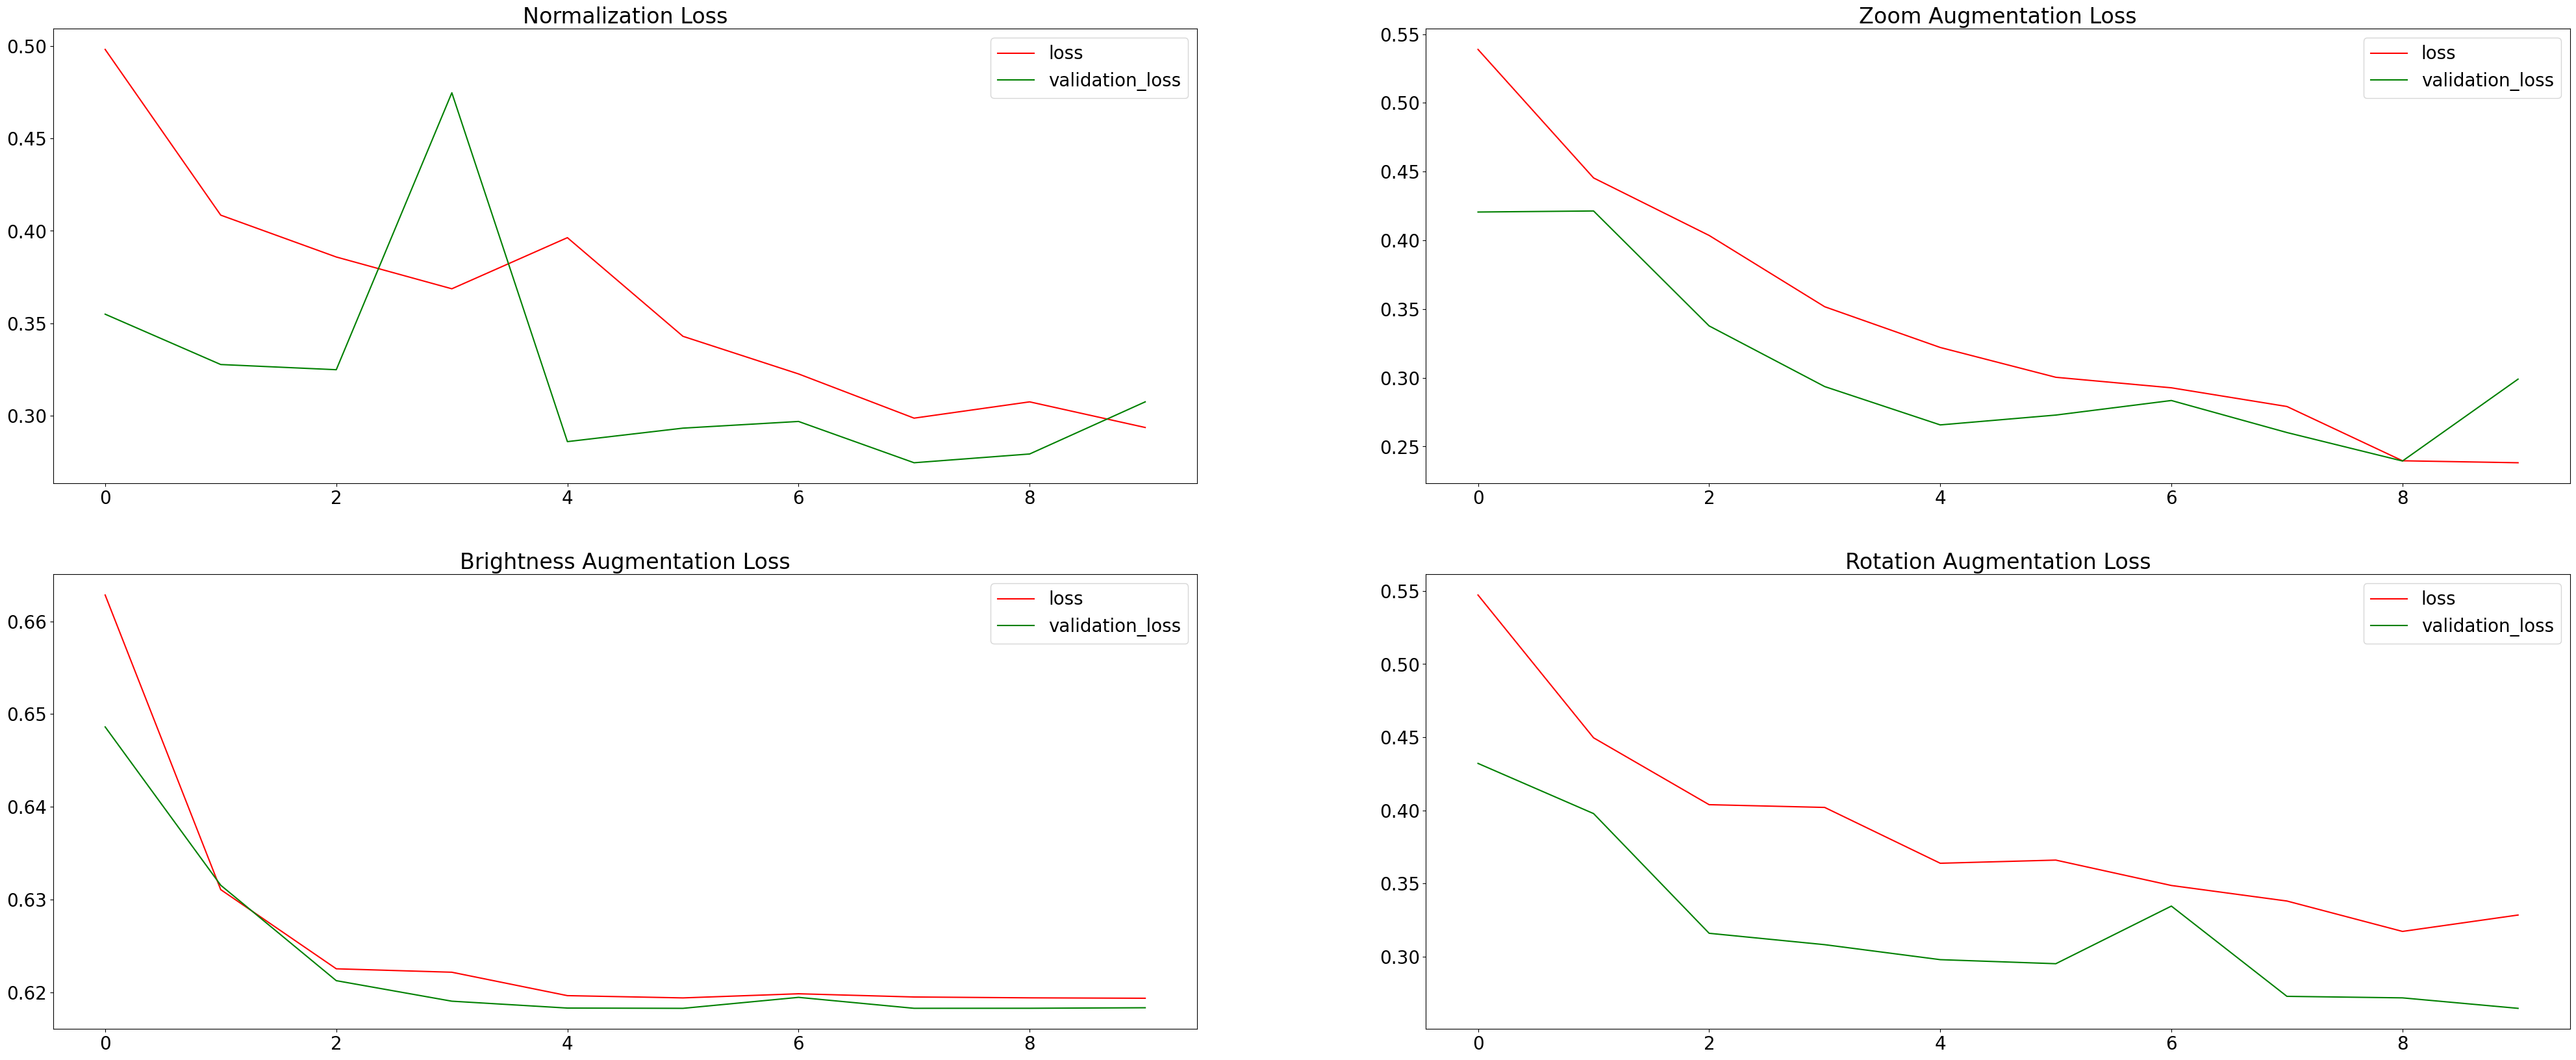

In [19]:
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(50,20))
plt.subplot(2,2,1)
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='validation_loss')
plt.title('Normalization Loss', fontsize=24)
plt.legend(loc="upper right")
#plt.show()

plt.subplot(2,2,2)
plt.plot(hist_zoom.history['loss'], color='red', label='loss')
plt.plot(hist_zoom.history['val_loss'], color='green', label='validation_loss')
plt.title('Zoom Augmentation Loss', fontsize=24)
plt.legend(loc="upper right")
#plt.show()

plt.subplot(2,2,3)
plt.plot(hist_bright.history['loss'], color='red', label='loss')
plt.plot(hist_bright.history['val_loss'], color='green', label='validation_loss')
plt.title('Brightness Augmentation Loss', fontsize=24)
plt.legend(loc="upper right")
#plt.show()

plt.subplot(2,2,4)
plt.plot(hist_rotate.history['loss'], color='red', label='loss')
plt.plot(hist_rotate.history['val_loss'], color='green', label='validation_loss')
plt.title('Rotation Augmentation Loss', fontsize=24)
plt.legend(loc="upper right")
plt.show()

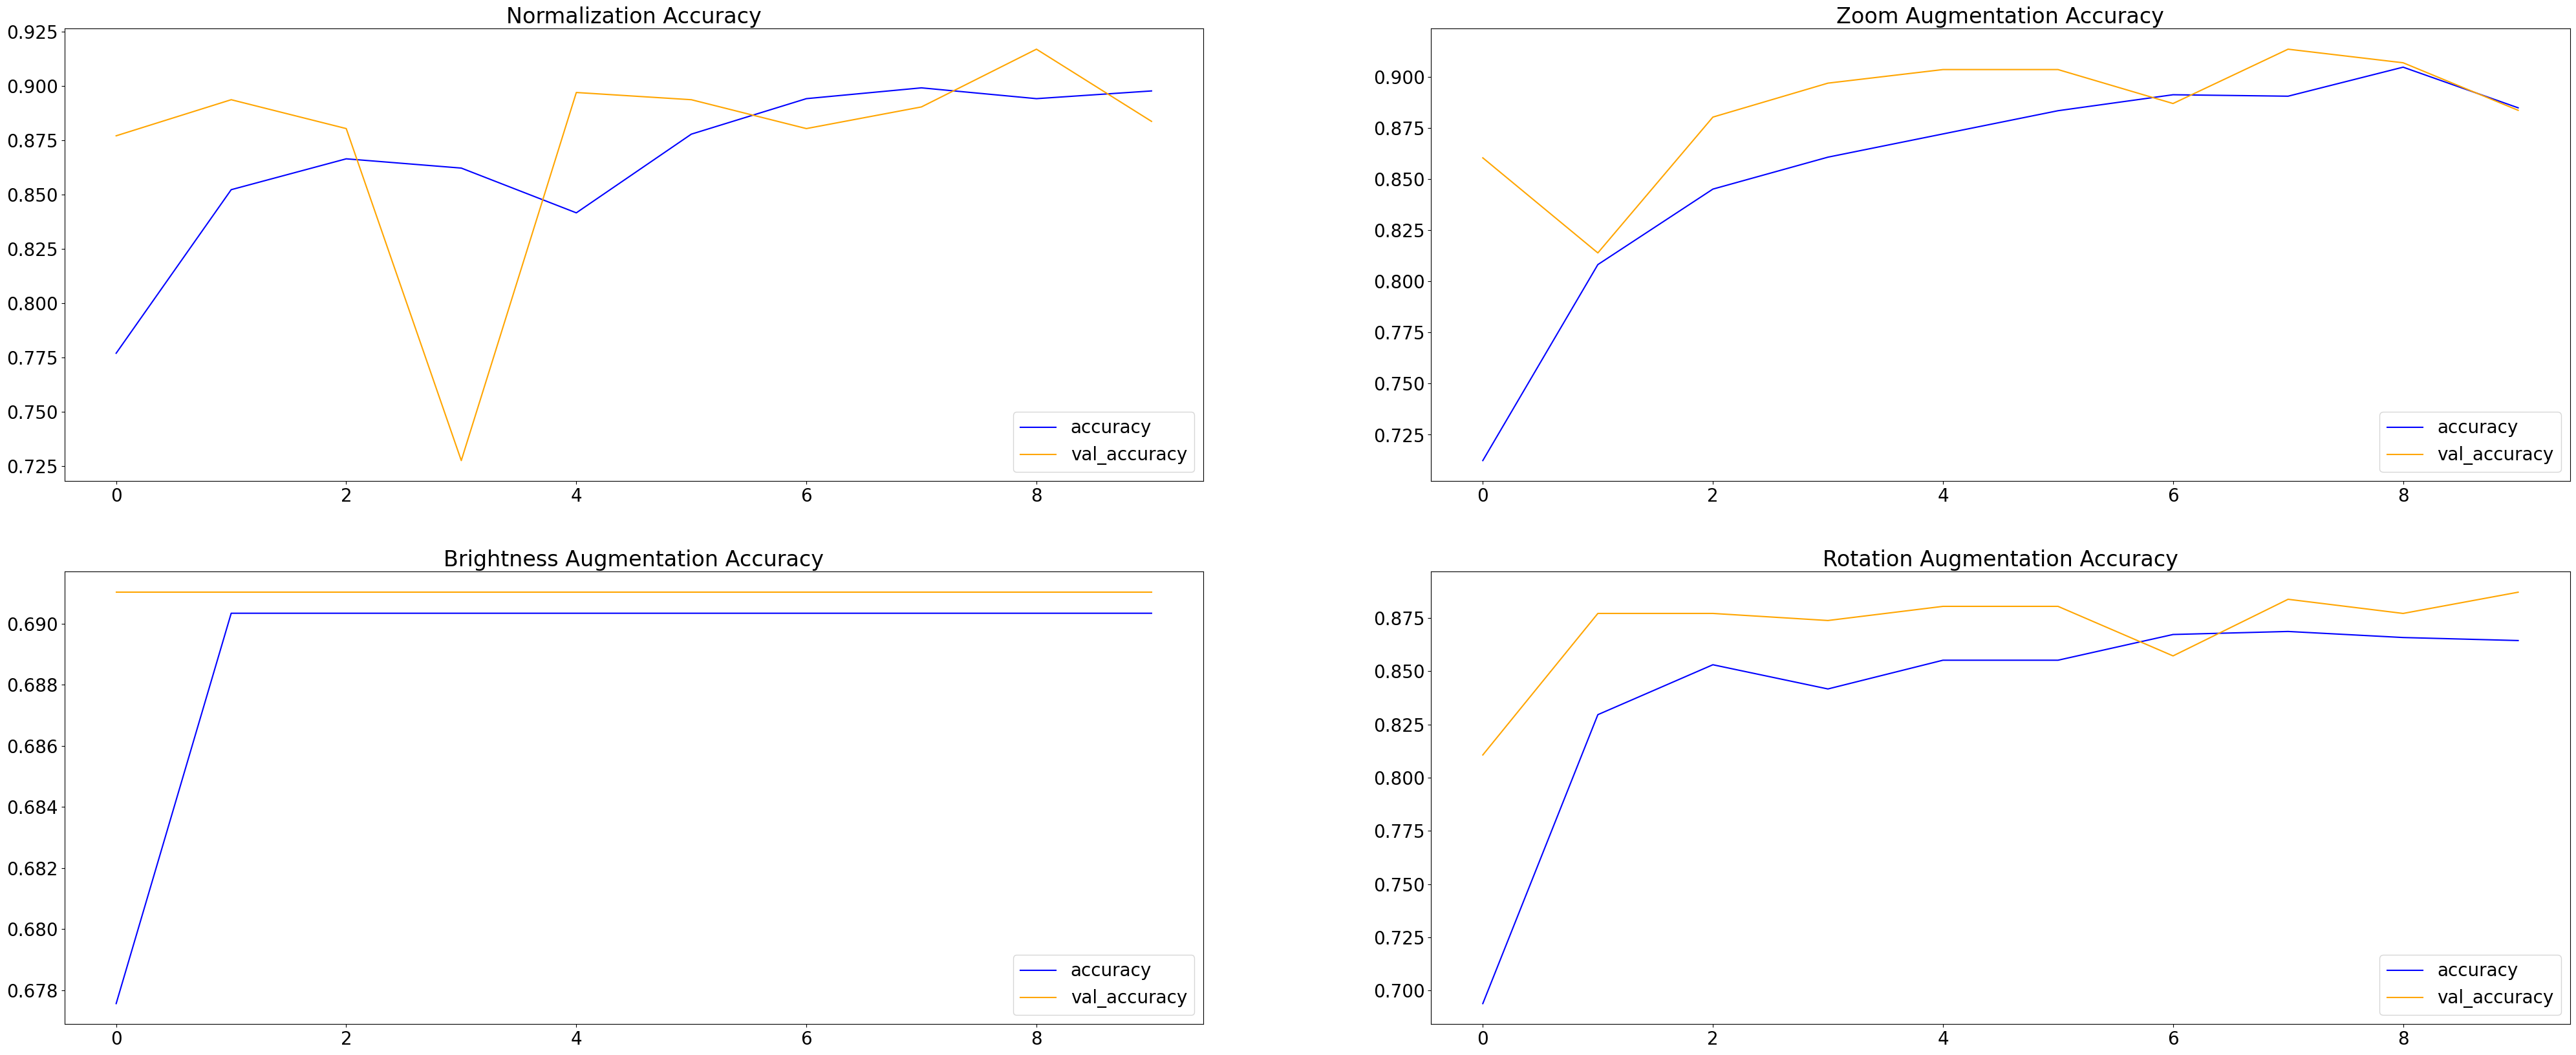

In [20]:
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(50,20))
plt.subplot(2,2,1)
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Normalization Accuracy', fontsize=24)
plt.legend(loc="lower right")
#plt.show()

plt.subplot(2,2,2)
plt.plot(hist_zoom.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist_zoom.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Zoom Augmentation Accuracy', fontsize=24)
plt.legend(loc="lower right")
#plt.show()

plt.subplot(2,2,3)
plt.plot(hist_bright.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist_bright.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Brightness Augmentation Accuracy', fontsize=24)
plt.legend(loc="lower right")
#plt.show()

plt.subplot(2,2,4)
plt.plot(hist_rotate.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist_rotate.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Rotation Augmentation Accuracy', fontsize=24)
plt.legend(loc="lower right")
plt.show()

Performance

In [21]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [22]:
precision = Precision()
recall = Recall()
binAccuracy = BinaryAccuracy()
y_pred_200 =[]
y_test_200 =[]

for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = modelCNN.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  binAccuracy.update_state(y, yhat)
  y_pred_200.extend(yhat)
  y_test_200.extend(y)

y_pred_200 = np.array(y_pred_200)
y_test_200 = np.array(y_test_200)

fpr_200, tpr_200, thresholds_200 = roc_curve(y_test_200, y_pred_200)
roc_auc_200 = auc(fpr_200, tpr_200)

1/1 [==============================] - 1s 571ms/step


In [23]:
print(f'Precision: {precision.result().numpy()}, Recall: {recall.result().numpy()}, Accuracy: {binAccuracy.result().numpy()}')

Precision: 0.8744588494300842, Recall: 0.961904764175415, Accuracy: 0.8782894611358643


In [24]:
precision_zoom = Precision()
recall_zoom = Recall()
binAccuracy_zoom = BinaryAccuracy()
y_pred_200_zoom =[]
y_test_200_zoom =[]

for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = modelCNN_zoom.predict(X)
  precision_zoom.update_state(y, yhat)
  recall_zoom.update_state(y, yhat)
  binAccuracy_zoom.update_state(y, yhat)
  y_pred_200_zoom.extend(yhat)
  y_test_200_zoom.extend(y)

y_pred_200_zoom = np.array(y_pred_200_zoom)
y_test_200_zoom = np.array(y_test_200_zoom)

fpr_200_zoom, tpr_200_zoom, thresholds_200_zoom = roc_curve(y_test_200_zoom, y_pred_200_zoom)
roc_auc_200_zoom = auc(fpr_200_zoom, tpr_200_zoom)

1/1 [==============================] - 0s 199ms/step


In [25]:
print(f'Precision: {precision_zoom.result().numpy()}, Recall: {recall_zoom.result().numpy()}, Accuracy: {binAccuracy_zoom.result().numpy()}')

Precision: 0.8765957355499268, Recall: 0.9809523820877075, Accuracy: 0.8914473652839661


In [26]:
precision_bright = Precision()
recall_bright = Recall()
binAccuracy_bright = BinaryAccuracy()
y_pred_200_bright =[]
y_test_200_bright =[]

for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = modelCNN_bright.predict(X)
  precision_bright.update_state(y, yhat)
  recall_bright.update_state(y, yhat)
  binAccuracy_bright.update_state(y, yhat)
  y_pred_200_bright.extend(yhat)
  y_test_200_bright.extend(y)

y_pred_200_bright = np.array(y_pred_200_bright)
y_test_200_bright = np.array(y_test_200_bright)

fpr_200_bright, tpr_200_bright, thresholds_200_bright = roc_curve(y_test_200_bright, y_pred_200_bright)
roc_auc_200_bright = auc(fpr_200_bright, tpr_200_bright)

1/1 [==============================] - 0s 144ms/step


In [27]:
print(f'Precision: {precision_bright.result().numpy()}, Recall: {recall_bright.result().numpy()}, Accuracy: {binAccuracy_bright.result().numpy()}')

Precision: 0.6907894611358643, Recall: 1.0, Accuracy: 0.6907894611358643


In [28]:
precision_rotate = Precision()
recall_rotate = Recall()
binAccuracy_rotate = BinaryAccuracy()
y_pred_200_rotate =[]
y_test_200_rotate =[]

for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = modelCNN_rotate.predict(X)
  precision_rotate.update_state(y, yhat)
  recall_rotate.update_state(y, yhat)
  binAccuracy_rotate.update_state(y, yhat)
  y_pred_200_rotate.extend(yhat)
  y_test_200_rotate.extend(y)

y_pred_200_rotate = np.array(y_pred_200_rotate)
y_test_200_rotate = np.array(y_test_200_rotate)

fpr_200_rotate, tpr_200_rotate, thresholds_200_rotate = roc_curve(y_test_200_rotate, y_pred_200_rotate)
roc_auc_200_rotate = auc(fpr_200_rotate, tpr_200_rotate)

1/1 [==============================] - 0s 187ms/step


In [29]:
print(f'Precision: {precision_rotate.result().numpy()}, Recall: {recall_rotate.result().numpy()}, Accuracy: {binAccuracy_rotate.result().numpy()}')

Precision: 0.875, Recall: 0.9333333373069763, Accuracy: 0.8618420958518982


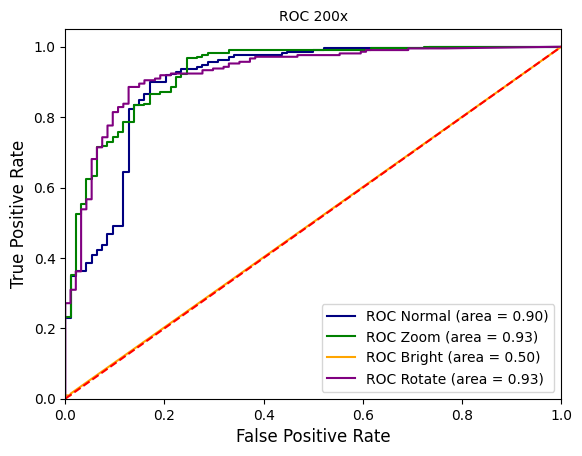

In [30]:
plt.figure()
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)
plt.plot(fpr_200, tpr_200, color='navy', label='ROC Normal (area = %0.2f)' % roc_auc_200)
plt.plot(fpr_200_zoom, tpr_200_zoom, color='green', label='ROC Zoom (area = %0.2f)' % roc_auc_200_zoom)
plt.plot(fpr_200_bright, tpr_200_bright, color='orange', label='ROC Bright (area = %0.2f)' % roc_auc_200_bright)
plt.plot(fpr_200_rotate, tpr_200_rotate, color='purple', label='ROC Rotate (area = %0.2f)' % roc_auc_200_rotate)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC 200x')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 14.722222222222216, 'Predicted')

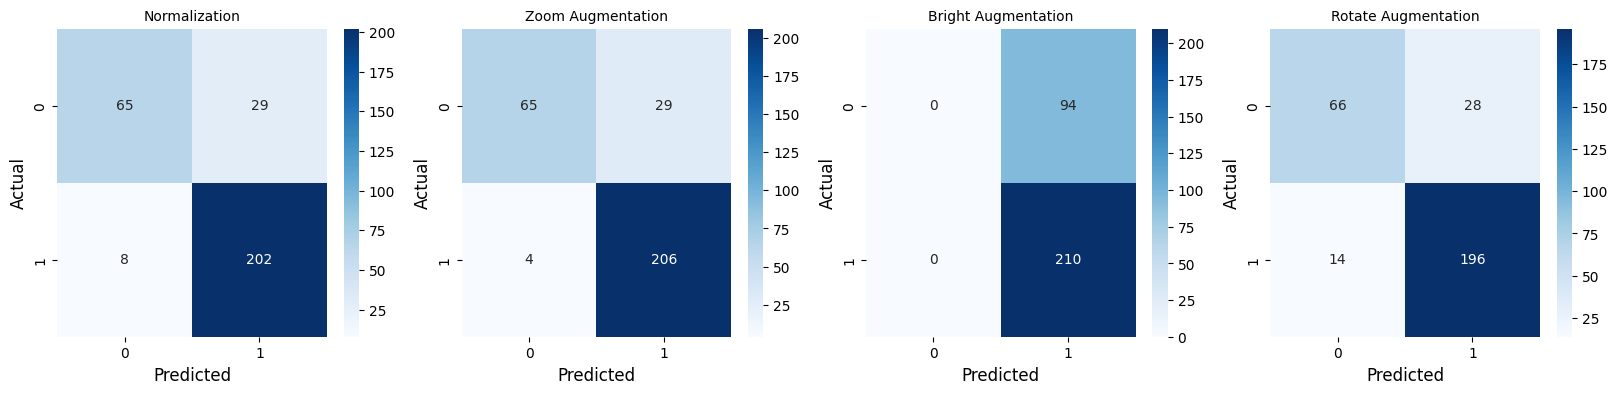

In [31]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)
y_pred_200 = (y_pred_200 > 0.5).astype(int)
y_pred_200_zoom = (y_pred_200_zoom > 0.5).astype(int)
y_pred_200_bright = (y_pred_200_bright > 0.5).astype(int)
y_pred_200_rotate = (y_pred_200_rotate > 0.5).astype(int)

plt.figure(figsize=(20, 4))

plt.subplot(1,4,1)
sns.heatmap(confusion_matrix(y_test_200, y_pred_200), annot=True, fmt='d', cmap='Blues')
plt.title('Normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,2)
sns.heatmap(confusion_matrix(y_test_200_zoom, y_pred_200_zoom), annot=True, fmt='d', cmap='Blues')
plt.title('Zoom Augmentation')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,3)
sns.heatmap(confusion_matrix(y_test_200_bright, y_pred_200_bright), annot=True, fmt='d', cmap='Blues')
plt.title('Bright Augmentation')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,4)
sns.heatmap(confusion_matrix(y_test_200_rotate, y_pred_200_rotate), annot=True, fmt='d', cmap='Blues')
plt.title('Rotate Augmentation')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [32]:
f1_200 = f1_score(y_test_200,y_pred_200)
mat = confusion_matrix(y_test_200, y_pred_200)
tn, fp, fn, tp = mat.ravel()
specificity_200 = tn / (tn+fp)
print('f1 score 200x:', f1_200)
print('specificity 200x:', specificity_200)

f1_200_zoom = f1_score(y_test_200_zoom,y_pred_200_zoom)
mat = confusion_matrix(y_test_200_zoom, y_pred_200_zoom)
tn, fp, fn, tp = mat.ravel()
specificity_200_zoom = tn / (tn+fp)
print('f1 score 200x zoom:', f1_200_zoom)
print('specificity 200x zoom:', specificity_200_zoom)

f1_200_bright = f1_score(y_test_200_bright,y_pred_200_bright)
mat = confusion_matrix(y_test_200_bright, y_pred_200_bright)
tn, fp, fn, tp = mat.ravel()
specificity_200_bright = tn / (tn+fp)
print('f1 score 200x brightness:', f1_200_bright)
print('specificity 200x brightness:', specificity_200_bright)

f1_200_rotate = f1_score(y_test_200_rotate,y_pred_200_rotate)
mat = confusion_matrix(y_test_200_rotate, y_pred_200_rotate)
tn, fp, fn, tp = mat.ravel()
specificity_200_rotate = tn / (tn+fp)
print('f1 score 200x rotate:', f1_200_rotate)
print('specificity 200x rotate:', specificity_200_rotate)

f1 score 200x: 0.9160997732426304
specificity 200x: 0.6914893617021277
f1 score 200x zoom: 0.9258426966292136
specificity 200x zoom: 0.6914893617021277
f1 score 200x brightness: 0.8171206225680934
specificity 200x brightness: 0.0
f1 score 200x rotate: 0.9032258064516129
specificity 200x rotate: 0.7021276595744681


#### **Magnification 40x**

In [33]:
hist_40 = modelCNN.fit(train_40, epochs=10, validation_data=validation_40)

Epoch 1/10
44/44 [==============================] - 709s 14s/step - loss: 0.4183 - accuracy: 0.8294 - val_loss: 0.4004 - val_accuracy: 0.8322
Epoch 2/10
44/44 [==============================] - 24s 483ms/step - loss: 0.3482 - accuracy: 0.8674 - val_loss: 0.3499 - val_accuracy: 0.8456
Epoch 3/10
44/44 [==============================] - 25s 518ms/step - loss: 0.3156 - accuracy: 0.8774 - val_loss: 0.3848 - val_accuracy: 0.8591
Epoch 4/10
44/44 [==============================] - 24s 493ms/step - loss: 0.3094 - accuracy: 0.8867 - val_loss: 0.3446 - val_accuracy: 0.8557
Epoch 5/10
44/44 [==============================] - 26s 529ms/step - loss: 0.2910 - accuracy: 0.8875 - val_loss: 0.4004 - val_accuracy: 0.8255
Epoch 6/10
44/44 [==============================] - 23s 465ms/step - loss: 0.2626 - accuracy: 0.8939 - val_loss: 0.3927 - val_accuracy: 0.8557
Epoch 7/10
44/44 [==============================] - 24s 458ms/step - loss: 0.2353 - accuracy: 0.9047 - val_loss: 0.3328 - val_accuracy: 0.8456


In [34]:
hist_40_zoom = modelCNN_zoom.fit(train_40, epochs=10, validation_data=validation_40)

Epoch 1/10
44/44 [==============================] - 25s 507ms/step - loss: 0.4331 - accuracy: 0.8344 - val_loss: 0.3677 - val_accuracy: 0.8456
Epoch 2/10
44/44 [==============================] - 23s 460ms/step - loss: 0.3584 - accuracy: 0.8538 - val_loss: 0.3345 - val_accuracy: 0.8591
Epoch 3/10
44/44 [==============================] - 24s 469ms/step - loss: 0.3357 - accuracy: 0.8581 - val_loss: 0.3245 - val_accuracy: 0.8691
Epoch 4/10
44/44 [==============================] - 23s 465ms/step - loss: 0.3243 - accuracy: 0.8638 - val_loss: 0.3207 - val_accuracy: 0.8758
Epoch 5/10
44/44 [==============================] - 23s 459ms/step - loss: 0.3139 - accuracy: 0.8774 - val_loss: 0.2980 - val_accuracy: 0.8725
Epoch 6/10
44/44 [==============================] - 24s 466ms/step - loss: 0.2915 - accuracy: 0.8731 - val_loss: 0.2959 - val_accuracy: 0.8826
Epoch 7/10
44/44 [==============================] - 24s 503ms/step - loss: 0.2943 - accuracy: 0.8832 - val_loss: 0.3718 - val_accuracy: 0.8221

In [35]:
hist_40_bright = modelCNN_bright.fit(train_40, epochs=10, validation_data=validation_40)

Epoch 1/10
44/44 [==============================] - 22s 447ms/step - loss: 0.6226 - accuracy: 0.6867 - val_loss: 0.6213 - val_accuracy: 0.6879
Epoch 2/10
44/44 [==============================] - 25s 463ms/step - loss: 0.6222 - accuracy: 0.6867 - val_loss: 0.6210 - val_accuracy: 0.6879
Epoch 3/10
44/44 [==============================] - 23s 467ms/step - loss: 0.6234 - accuracy: 0.6867 - val_loss: 0.6208 - val_accuracy: 0.6879
Epoch 4/10
44/44 [==============================] - 25s 491ms/step - loss: 0.6230 - accuracy: 0.6867 - val_loss: 0.6208 - val_accuracy: 0.6879
Epoch 5/10
44/44 [==============================] - 23s 462ms/step - loss: 0.6231 - accuracy: 0.6867 - val_loss: 0.6208 - val_accuracy: 0.6879
Epoch 6/10
44/44 [==============================] - 24s 502ms/step - loss: 0.6222 - accuracy: 0.6867 - val_loss: 0.6208 - val_accuracy: 0.6879
Epoch 7/10
44/44 [==============================] - 22s 457ms/step - loss: 0.6230 - accuracy: 0.6867 - val_loss: 0.6209 - val_accuracy: 0.6879

In [36]:
hist_40_rotate = modelCNN_rotate.fit(train_40, epochs=10, validation_data=validation_40)

Epoch 1/10
44/44 [==============================] - 25s 512ms/step - loss: 0.4456 - accuracy: 0.8057 - val_loss: 0.3965 - val_accuracy: 0.8322
Epoch 2/10
44/44 [==============================] - 23s 464ms/step - loss: 0.4141 - accuracy: 0.8151 - val_loss: 0.3924 - val_accuracy: 0.8322
Epoch 3/10
44/44 [==============================] - 30s 624ms/step - loss: 0.3950 - accuracy: 0.8287 - val_loss: 0.3892 - val_accuracy: 0.8188
Epoch 4/10
44/44 [==============================] - 35s 743ms/step - loss: 0.4063 - accuracy: 0.8158 - val_loss: 0.3711 - val_accuracy: 0.8523
Epoch 5/10
44/44 [==============================] - 25s 479ms/step - loss: 0.4061 - accuracy: 0.8108 - val_loss: 0.3869 - val_accuracy: 0.8423
Epoch 6/10
44/44 [==============================] - 23s 462ms/step - loss: 0.3680 - accuracy: 0.8437 - val_loss: 0.3394 - val_accuracy: 0.8557
Epoch 7/10
44/44 [==============================] - 29s 528ms/step - loss: 0.3598 - accuracy: 0.8473 - val_loss: 0.3472 - val_accuracy: 0.8523

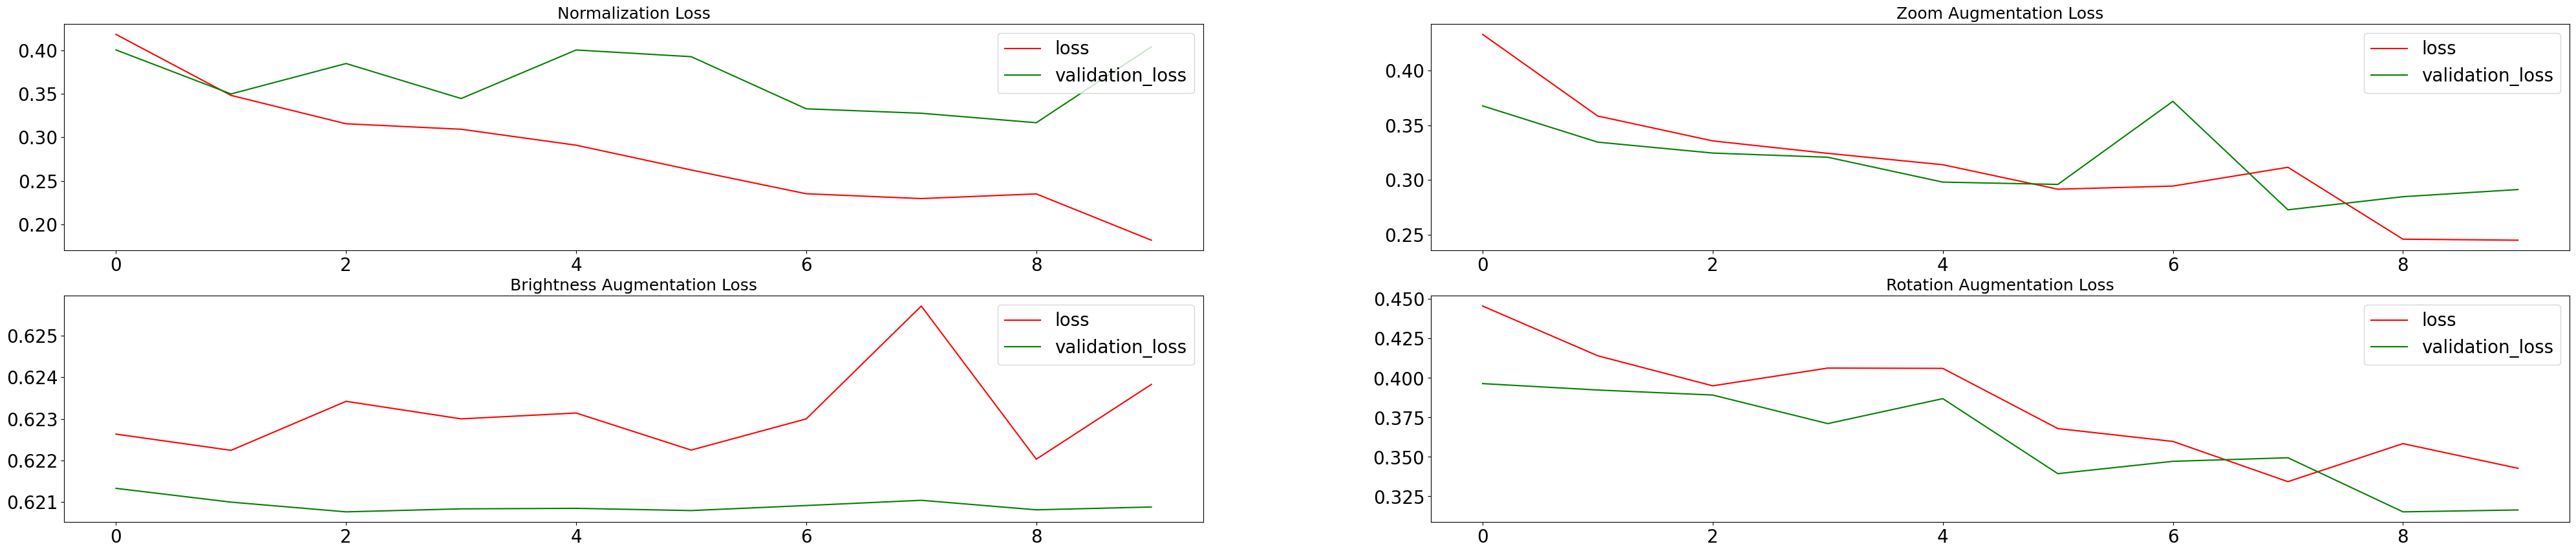

In [37]:
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(50,10))
plt.subplot(2,2,1)
plt.plot(hist_40.history['loss'], color='red', label='loss')
plt.plot(hist_40.history['val_loss'], color='green', label='validation_loss')
plt.title('Normalization Loss', fontsize=18)
plt.legend(loc="upper right")
#plt.show()

#fig = plt.figure()
plt.subplot(2,2,2)
plt.plot(hist_40_zoom.history['loss'], color='red', label='loss')
plt.plot(hist_40_zoom.history['val_loss'], color='green', label='validation_loss')
plt.title('Zoom Augmentation Loss', fontsize=18)
plt.legend(loc="upper right")
#plt.show()

#fig = plt.figure()
plt.subplot(2,2,3)
plt.plot(hist_40_bright.history['loss'], color='red', label='loss')
plt.plot(hist_40_bright.history['val_loss'], color='green', label='validation_loss')
plt.title('Brightness Augmentation Loss', fontsize=18)
plt.legend(loc="upper right")
#plt.show()

#fig = plt.figure()
plt.subplot(2,2,4)
plt.plot(hist_40_rotate.history['loss'], color='red', label='loss')
plt.plot(hist_40_rotate.history['val_loss'], color='green', label='validation_loss')
plt.title('Rotation Augmentation Loss', fontsize=18)
plt.legend(loc="upper right")
plt.show()

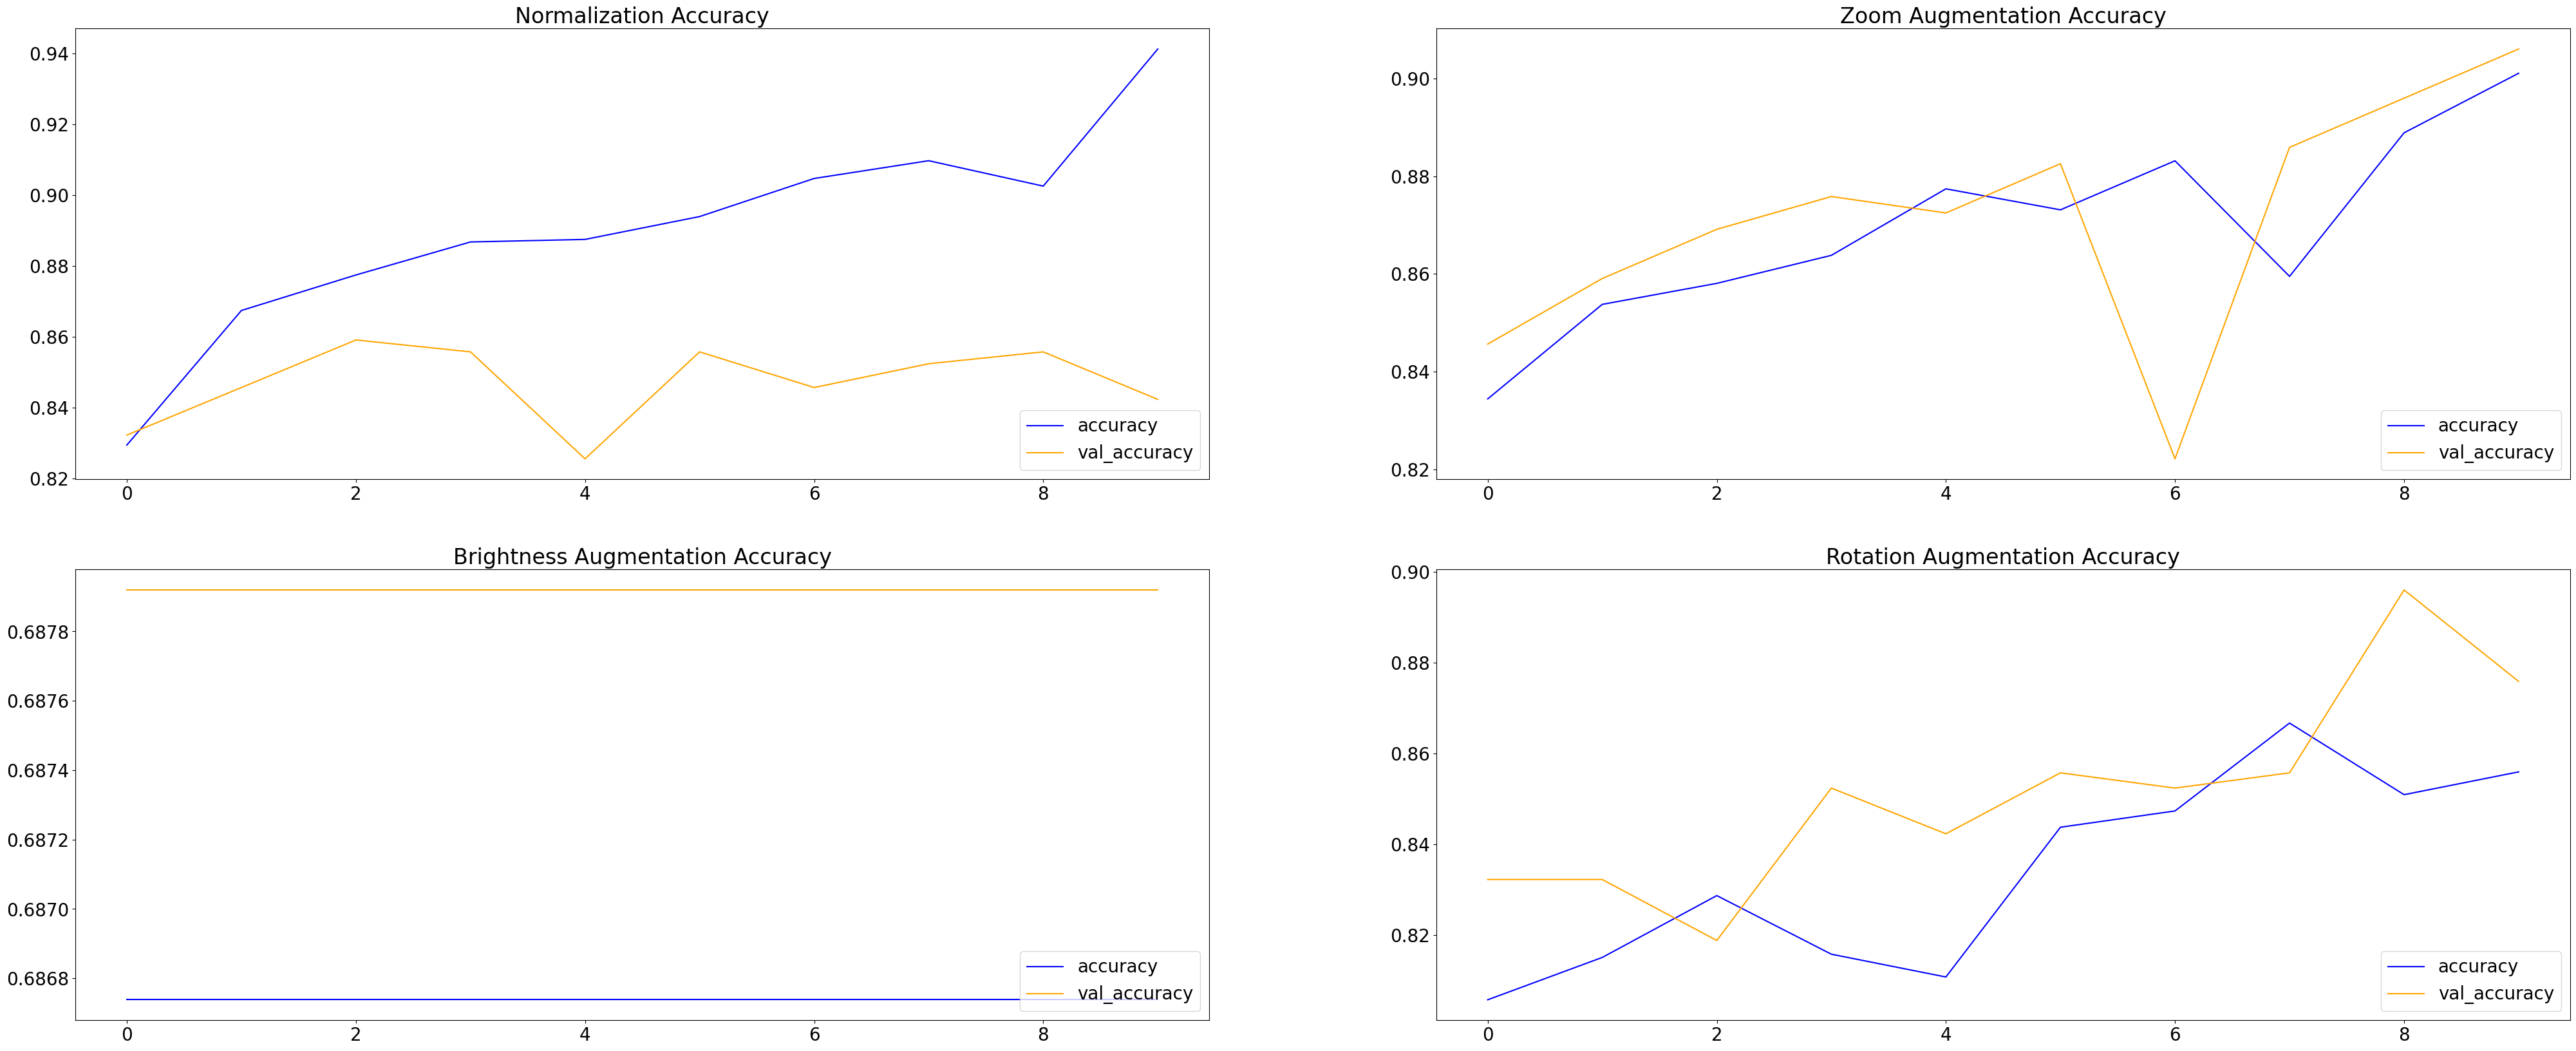

In [38]:
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

fig = plt.figure(figsize=(50,20))
plt.subplot(2,2,1)
plt.plot(hist_40.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist_40.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Normalization Accuracy', fontsize=24)
plt.legend(loc="lower right")
#plt.show()

plt.subplot(2,2,2)
plt.plot(hist_40_zoom.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist_40_zoom.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Zoom Augmentation Accuracy', fontsize=24)
plt.legend(loc="lower right")
#plt.show()

plt.subplot(2,2,3)
plt.plot(hist_40_bright.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist_40_bright.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Brightness Augmentation Accuracy', fontsize=24)
plt.legend(loc="lower right")
#plt.show()

plt.subplot(2,2,4)
plt.plot(hist_40_rotate.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist_40_rotate.history['val_accuracy'], color='orange', label='val_accuracy')
plt.title('Rotation Augmentation Accuracy', fontsize=24)
plt.legend(loc="lower right")
plt.show()

In [39]:
precision_40 = Precision()
recall_40 = Recall()
binAccuracy_40 = BinaryAccuracy()
y_pred_40 =[]
y_test_40 =[]

for batch in test_40.as_numpy_iterator():
  X, y = batch
  yhat = modelCNN.predict(X)
  precision_40.update_state(y, yhat)
  recall_40.update_state(y, yhat)
  binAccuracy_40.update_state(y, yhat)
  y_pred_40.extend(yhat)
  y_test_40.extend(y)

y_pred_40 = np.array(y_pred_40)
y_test_40 = np.array(y_test_40)

fpr_40, tpr_40, thresholds_40 = roc_curve(y_test_40, y_pred_40)
roc_auc_40 = auc(fpr_40, tpr_40)

1/1 [==============================] - 0s 407ms/step


In [40]:
print(f'Precision: {precision_40.result().numpy()}, Recall: {recall_40.result().numpy()}, Accuracy: {binAccuracy_40.result().numpy()}')

Precision: 0.8899521827697754, Recall: 0.8985507488250732, Accuracy: 0.8543046116828918


In [41]:
precision_40_zoom = Precision()
recall_40_zoom = Recall()
binAccuracy_40_zoom = BinaryAccuracy()
y_pred_40_zoom =[]
y_test_40_zoom =[]

for batch in test_40.as_numpy_iterator():
  X, y = batch
  yhat = modelCNN_zoom.predict(X)
  precision_40_zoom.update_state(y, yhat)
  recall_40_zoom.update_state(y, yhat)
  binAccuracy_40_zoom.update_state(y, yhat)
  y_pred_40_zoom.extend(yhat)
  y_test_40_zoom.extend(y)

y_pred_40_zoom = np.array(y_pred_40_zoom)
y_test_40_zoom = np.array(y_test_40_zoom)

fpr_40_zoom, tpr_40_zoom, thresholds_40_zoom = roc_curve(y_test_40_zoom, y_pred_40_zoom)
roc_auc_40_zoom = auc(fpr_40_zoom, tpr_40_zoom)

1/1 [==============================] - 0s 38ms/step


In [42]:
print(f'Precision: {precision_40_zoom.result().numpy()}, Recall: {recall_40_zoom.result().numpy()}, Accuracy: {binAccuracy_40_zoom.result().numpy()}')

Precision: 0.9086538553237915, Recall: 0.9130434989929199, Accuracy: 0.8774834275245667


In [43]:
precision_40_bright = Precision()
recall_40_bright = Recall()
binAccuracy_40_bright = BinaryAccuracy()
y_pred_40_bright =[]
y_test_40_bright =[]

for batch in test_40.as_numpy_iterator():
  X, y = batch
  yhat = modelCNN_bright.predict(X)
  precision_40_bright.update_state(y, yhat)
  recall_40_bright.update_state(y, yhat)
  binAccuracy_40_bright.update_state(y, yhat)
  y_pred_40_bright.extend(yhat)
  y_test_40_bright.extend(y)

y_pred_40_bright = np.array(y_pred_40_bright)
y_test_40_bright = np.array(y_test_40_bright)

fpr_40_bright, tpr_40_bright, thresholds_40_bright = roc_curve(y_test_40_bright, y_pred_40_bright)
roc_auc_40_bright = auc(fpr_40_bright, tpr_40_bright)

1/1 [==============================] - 0s 74ms/step


In [44]:
print(f'Precision: {precision_40_bright.result().numpy()}, Recall: {recall_40_bright.result().numpy()}, Accuracy: {binAccuracy_40_bright.result().numpy()}')

Precision: 0.6854304671287537, Recall: 1.0, Accuracy: 0.6854304671287537


In [45]:
precision_40_rotate = Precision()
recall_40_rotate = Recall()
binAccuracy_40_rotate = BinaryAccuracy()
y_pred_40_rotate =[]
y_test_40_rotate =[]

for batch in test_40.as_numpy_iterator():
  X, y = batch
  yhat = modelCNN_rotate.predict(X)
  precision_40_rotate.update_state(y, yhat)
  recall_40_rotate.update_state(y, yhat)
  binAccuracy_40_rotate.update_state(y, yhat)
  y_pred_40_rotate.extend(yhat)
  y_test_40_rotate.extend(y)

y_pred_40_rotate = np.array(y_pred_40_rotate)
y_test_40_rotate = np.array(y_test_40_rotate)

fpr_40_rotate, tpr_40_rotate, thresholds_40_rotate = roc_curve(y_test_40_rotate, y_pred_40_rotate)
roc_auc_40_rotate = auc(fpr_40_rotate, tpr_40_rotate)

1/1 [==============================] - 0s 55ms/step


In [46]:
print(f'Precision: {precision_40_rotate.result().numpy()}, Recall: {recall_40_rotate.result().numpy()}, Accuracy: {binAccuracy_40_rotate.result().numpy()}')

Precision: 0.8904109597206116, Recall: 0.9420289993286133, Accuracy: 0.8807947039604187


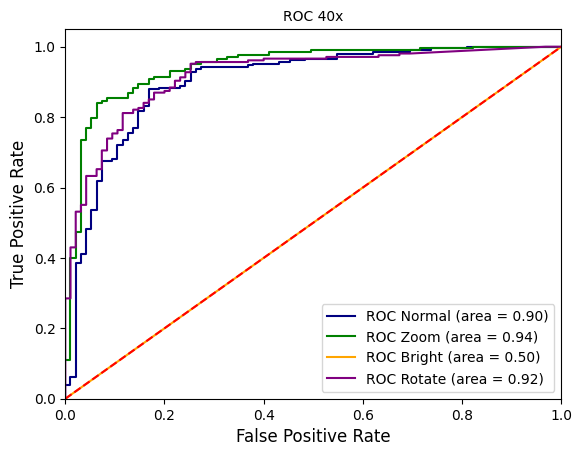

In [47]:
plt.figure()
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)
plt.plot(fpr_40, tpr_40, color='navy', label='ROC Normal (area = %0.2f)' % roc_auc_40)
plt.plot(fpr_40_zoom, tpr_40_zoom, color='green', label='ROC Zoom (area = %0.2f)' % roc_auc_40_zoom)
plt.plot(fpr_40_bright, tpr_40_bright, color='orange', label='ROC Bright (area = %0.2f)' % roc_auc_40_bright)
plt.plot(fpr_40_rotate, tpr_40_rotate, color='purple', label='ROC Rotate (area = %0.2f)' % roc_auc_40_rotate)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC 40x')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 14.722222222222216, 'Predicted')

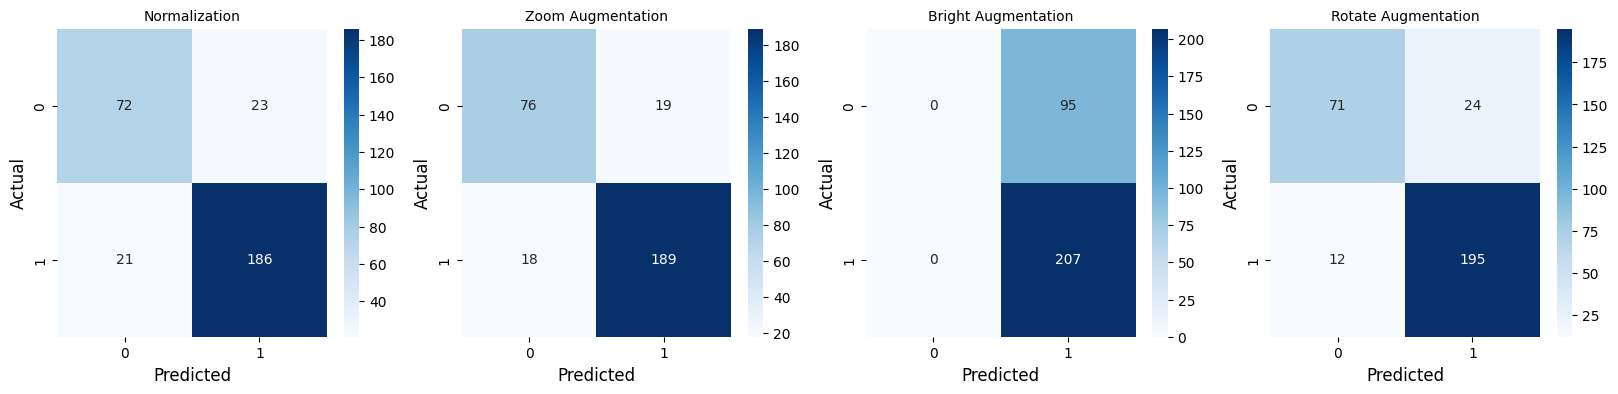

In [48]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

y_pred_40 = (y_pred_40 > 0.5).astype(int)
y_pred_40_zoom = (y_pred_40_zoom > 0.5).astype(int)
y_pred_40_bright = (y_pred_40_bright > 0.5).astype(int)
y_pred_40_rotate = (y_pred_40_rotate > 0.5).astype(int)

plt.figure(figsize=(20, 4))

plt.subplot(1,4,1)
sns.heatmap(confusion_matrix(y_test_40, y_pred_40), annot=True, fmt='d', cmap='Blues')
plt.title('Normalization')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,2)
sns.heatmap(confusion_matrix(y_test_40_zoom, y_pred_40_zoom), annot=True, fmt='d', cmap='Blues')
plt.title('Zoom Augmentation')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,3)
sns.heatmap(confusion_matrix(y_test_40_bright, y_pred_40_bright), annot=True, fmt='d', cmap='Blues')
plt.title('Bright Augmentation')
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.subplot(1,4,4)
sns.heatmap(confusion_matrix(y_test_40_rotate, y_pred_40_rotate), annot=True, fmt='d', cmap='Blues')
plt.title('Rotate Augmentation')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [49]:
f1_40 = f1_score(y_test_40,y_pred_40)
mat = confusion_matrix(y_test_40, y_pred_40)
tn, fp, fn, tp = mat.ravel()
specificity_40 = tn / (tn+fp)
print('f1 score 40x:', f1_40)
print('specificity 40x:', specificity_40)

f1_40_zoom = f1_score(y_test_40_zoom,y_pred_40_zoom)
mat = confusion_matrix(y_test_40_zoom, y_pred_40_zoom)
tn, fp, fn, tp = mat.ravel()
specificity_40_zoom = tn / (tn+fp)
print('f1 score 40x zoom:', f1_40_zoom)
print('specificity 40x zoom:', specificity_40_zoom)

f1_40_bright = f1_score(y_test_40_bright,y_pred_40_bright)
mat = confusion_matrix(y_test_40_bright, y_pred_40_bright)
tn, fp, fn, tp = mat.ravel()
specificity_40_bright = tn / (tn+fp)
print('f1 score 40x brightness:', f1_40_bright)
print('specificity 40x brightness:', specificity_40_bright)

f1_40_rotate = f1_score(y_test_40_rotate,y_pred_40_rotate)
mat = confusion_matrix(y_test_40_rotate, y_pred_40_rotate)
tn, fp, fn, tp = mat.ravel()
specificity_40_rotate = tn / (tn+fp)
print('f1 score 40x rotate:', f1_40_rotate)
print('specificity 40x rotate:', specificity_40_rotate)

f1 score 40x: 0.8942307692307692
specificity 40x: 0.7578947368421053
f1 score 40x zoom: 0.9108433734939758
specificity 40x zoom: 0.8
f1 score 40x brightness: 0.8133595284872298
specificity 40x brightness: 0.0
f1 score 40x rotate: 0.9154929577464788
specificity 40x rotate: 0.7473684210526316
